# 基于10000最受欢迎的电影的分析
***

# Part 1: 选题原因及研究意义

选题的主要原因是我个人比较喜欢看电影，对各种类型的电影都有涉猎，但是近几年上映的电影大多都不尽人意，因此想要基于最受欢迎的10000部电影的相关数据做一些分析。
此外，对于改数据集的研究可以让我们直观的看到影响电影受欢迎程度的一些因素，以及疫情封控后电影行业受到的一些影响。

# Part 2: 数据集介绍及数据预处理

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>original_language</th>
      <th>original_title</th>
      <th>popularity</th>
      <th>release_date</th>
      <th>vote_average</th>
      <th>vote_count</th>
      <th>genre</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>580489</td>
      <td>en</td>
      <td>Venom: Let There Be Carnage</td>
      <td>8222.616</td>
      <td>2021/9/30</td>
      <td>7.0</td>
      <td>828</td>
      <td>['Science Fiction', 'Action']</td>
    </tr>
    <tr>
      <th>1</th>
      <td>335983</td>
      <td>en</td>
      <td>Venom</td>
      <td>3012.242</td>
      <td>2018/9/28</td>
      <td>6.8</td>
      <td>11846</td>
      <td>['Science Fiction', 'Action']</td>
    </tr>
    <tr>
      <th>2</th>
      <td>550988</td>
      <td>en</td>
      <td>Free Guy</td>
      <td>3864.616</td>
      <td>2021/8/11</td>
      <td>7.8</td>
      <td>2908</td>
      <td>['Comedy', 'Action', 'Adventure', 'Science Fic...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>772436</td>
      <td>es</td>
      <td>Matando Cabos 2, La M¨¢scara del M¨¢scara</td>
      <td>2556.789</td>
      <td>2021/10/1</td>
      <td>7.7</td>
      <td>34</td>
      <td>['Action', 'Comedy', 'Adventure']</td>
    </tr>
    <tr>
      <th>4</th>
      <td>568620</td>
      <td>en</td>
      <td>Snake Eyes: G.I. Joe Origins</td>
      <td>2164.071</td>
      <td>2021/7/22</td>
      <td>6.9</td>
      <td>685</td>
      <td>['Action', 'Adventure']</td>
    </tr>
  </tbody>
</table>
</div>

该数据集包含了从1902年——2028年（未上映但是档期已经确定）10000条最受欢迎的电影的数据，范围覆盖全球44种语言，包含字段：id，original_language，original_title，popularity，release_date，vote_average，vote_count，genre。部分字段存在数据缺失，并且有上百处字段错位，popularity字段被包含进了original_title字段，错位问题通过手动复位的方式解决。此外，原始数据除了的类型仅有常规和自定义两种，需要处理后才能进行使用。

##  2.1. 缺失值处理
***

先查看了是否有字段存在缺失值，得到了以下结果：

- id                   False
- original_language    False
- original_title       False
- popularity           False
- release_date          True
- vote_average         False
- vote_count           False
- genre                False
- dtype: bool

查看缺失值：

- id                    0
- original_language     0
- original_title        0
- popularity            0
- release_date         40
- vote_average          0
- vote_count            0
- genre                 0
- dtype: int64

可以看出release_date这一列数据存在缺失值，由于部分电影年代过于久远，缺失的这一数据难以通过其他方式补齐，并且缺失这一字段的数据仅仅占极少数，因此这里选择直接删除缺失release_date的相关数据,得到剩余的9960部电影的数据，并且另存为名为processed_data。

##  2.2. 数据类型的转换
***

先查看各个字段的数据类型：
- id                     int64
- original_language     object
- original_title        object
- popularity           float64
- release_date          object
- vote_average         float64
- vote_count             int64
- genre                 object
- dtype: object

release_date这一字段，由于后续操作需要根据日期进行检索，因此需要将其转换为日期型的数据


##  2.3. 获取后续需要使用的数据
***

统计数据集中出现的电影发布年份：

[2021 2018 2020 2017 2009 2012 2019 2007 2022 2008 2013 2010 2015 2014
 2001 2005 2023 2002 1978 2004 2011 1986 1993 1981 1984 2016 1988 1989
 1998 1994 1995 1997 1999 1996 2000 2003 1991 2006 1950 1973 1990 1992
 1938 1940 1972 1982 1974 1941 1942 1961 1967 1971 1951 1980 1977 1939
 1953 1985 1959 1983 1970 1987 1975 1955 1963 1956 1976 1966 1979 1968
 1969 1964 1960 1962 2028 1946 2024 1965 1949 1957 2026 1933 1932 1954
 1931 1922 1945 1958 1947 1952 1927 1948 1902 1920 1926 1936 1943 1944
 1925 1935 1934 1930 1928 1929 1915]

获取最受欢迎的10000部电影中数据集中，各个年份的电影数：

- release_date
- 2021    831
- 2019    603
- 2018    577
- 2017    574
- 2020    571
-        ... 
- 1926      1
- 1920      1
- 1902      1
- 2028      1
- 1915      1
- Name: count, Length: 105, dtype: int64

统计出各个发布年份下最受欢迎的电影的popularity（受欢迎程度）：

- year
- 1902      11.440
- 1915       8.544
- 1920      11.928
- 1922      11.077
- 1925      12.296
-           ...   
- 2019     311.132
- 2020    1786.875
- 2021    8222.616
- 2022     273.981
- 2023     194.837
- Name: popularity, Length: 102, dtype: float64

统计出各个发布年份下最受欢迎的电影的投票人数：

- year
- 1902     1211
- 1915      364
- 1920     1005
- 1922     1321
- 1925     1094
-         ...  
- 2017    17253
- 2018    22877
- 2019    19295
- 2020     8159
- 2021     7092
- Name: vote_count, Length: 100, dtype: int64

找到每个电影类型下popularity的最大值：

-                 genre  popularity
- 1            'Action'    8222.616
- 2         'Adventure'    3864.616
- 6       'Documentary'     134.988
- 7             'Drama'    1878.150
- 8            'Family'    2191.005
- 9           'Fantasy'    1523.567
- 10          'History'     337.863
- 12            'Music'     519.264
- 13          'Mystery'    1078.555
- 16         'TV Movie'     652.862
- 17         'Thriller'    2636.999
- 18              'War'     231.406
- 22        'Animation'    2191.005
- 23           'Comedy'    3864.616
- 24            'Crime'    1878.150
- 30           'Horror'    2636.999
- 33          'Romance'     891.224
- 34  'Science Fiction'    8222.616
- 38          'Western'     749.644

找到每种语言下最大的popularity：

- original_language
- ar      15.162
- bn      15.885
- ca      33.405
- cn     484.175
- cs      19.243
- da     262.181
- de     146.829
- el      16.827
- en    8222.616
- es    2556.789
- eu      15.315
- fa      29.390
- fi      22.368
- fr    1250.578
- he      10.987
- hi      58.070
- hu      39.627
- id      63.576
- is      30.689
- it     135.521
- ja    1441.444
- ko     297.042
- ku       8.992
- la      17.801
- lv      50.735
- ms      16.975
- nb      15.273
- nl     109.953
- no      43.750
- pa      16.080
- pl     191.948
- pt     297.261
- ro      49.690
- ru    1316.689
- sr      62.043
- sv     102.627
- ta      22.599
- te      49.620
- th      74.976
- tl      87.021
- tr    1878.150
- uk      20.834
- xx      21.949
- zh     889.098
- Name: popularity, dtype: float64



# Part 3: 数据可视化及分析

**根据各个年份下上映的电影数的数据，可以得到以下柱状图：**

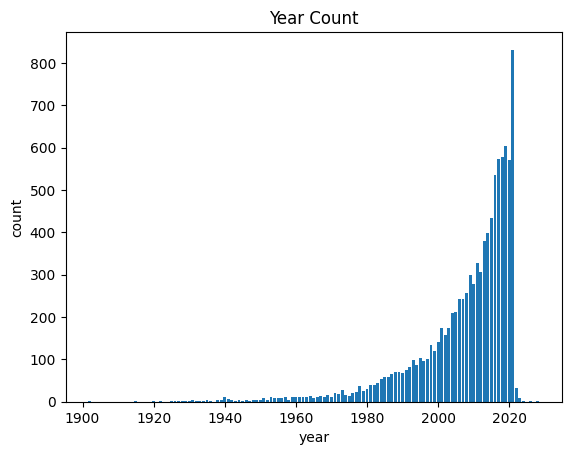

Year Count呈现的是最受欢迎的10000部电影的排名的电影，按照上映时间的年度分布。进入这一图表可以反映出电影行业的发展，进入最受欢迎的10000部电影的排名的电影数量在2020年前随着年份递增，这一方面可能是因为早期电影技术不够成熟，每年能够上映的电影总数比较少，另一方面也可能是因为电影行业经过较长时间的发展，画面等技术都得到了提升，并且宣发上也做得越来越好，使得电影对观众的吸引力也得到了增强。


**根据每个年份下最受欢迎的电影的popularity值，可以得到以下柱状图：**

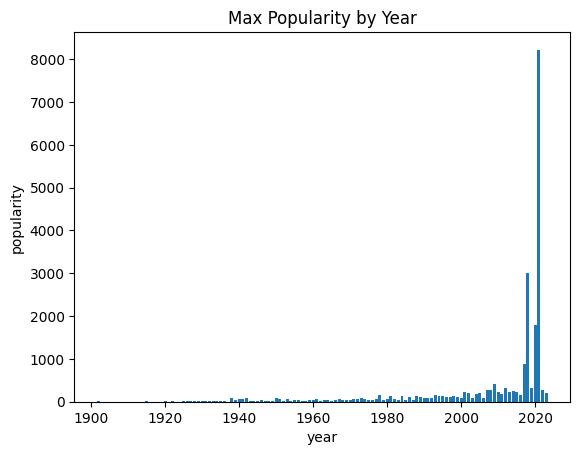

Max Popularity by Year呈现的是每年最受欢迎的电影的popularity值。这一图表反映了电影制作水平以及宣发水平的提高，由图表可以发现，在2017年之前，每年最受欢迎的电影的popularity都相对较低，均低于1000，但2017年后，每年最受欢迎的电影的popularity得到了巨大的提高，可见这几年内电影行业蓬勃发展。这很有可能是因为良好市场环境的出现以及电影制作以及宣发技术的提高共同导致的结果。


**根据每个年份下最多的投票人数，可以得到以下折线图：**

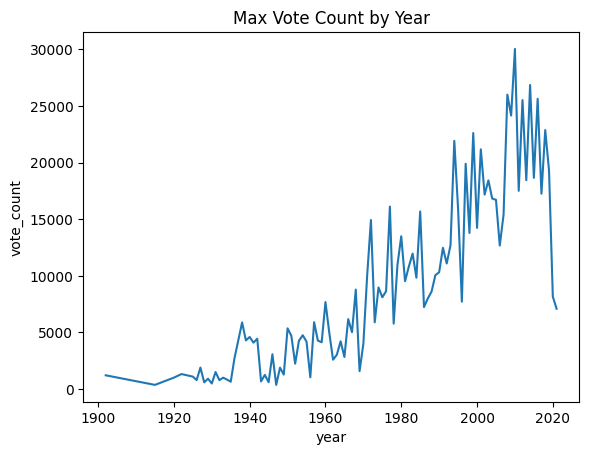

Max Vote Count by Year呈现的是每年被投票、评分最多的电影的参与投票、评分的人数。这一图表也反映了观众对于电影的关注度在2020年前总体呈波动上升趋势。

结合上面三张图表，我们发现3项均能反映电影受欢迎程度和电影行业发展势态的数据，在2021年后均有十分明显的下降，这很可能是新冠疫情期间封控和大量电影院关闭导致的。新冠疫情期间，电影业处境艰难，在以上三张图表中可见一斑。

**各种电影类型中最受欢迎的的电影的popularity**

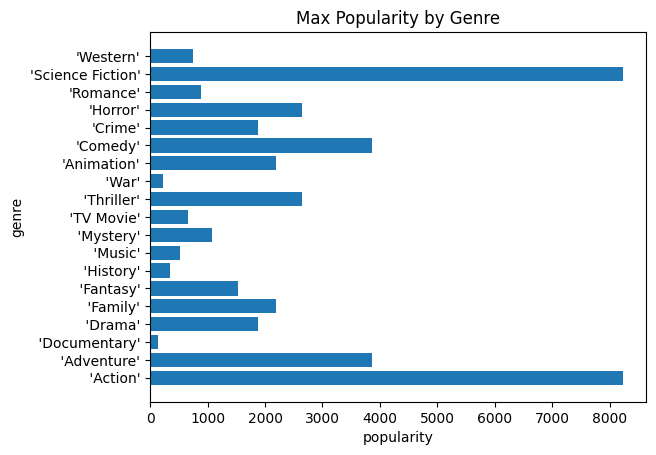

上面这张图表反映了不同类型的电影的受欢迎程度的区别，从上图可以看出，最受欢迎的是科幻、动作、冒险以及喜剧类电影，而受欢迎程度最低的是纪录片类和战争类电影。这很可能是因为商业片大多数为科幻、动作、冒险以及喜剧类电影，这类电影前期宣发做的都相对更好，受众广，观看门槛较低，并且画面和视觉效果更好，受欢迎程度也就普遍更高；而战争类电影和纪录片类电影，其题材和剧情对大多数观众的吸引力都相对较弱，并且观看并且理解需要的门槛更高，不是所有观众都能看懂其想反映的思想，因此更加小众，受欢迎程度也就相对较低。

**各种语言的电影中最受欢迎的电影的popularity**

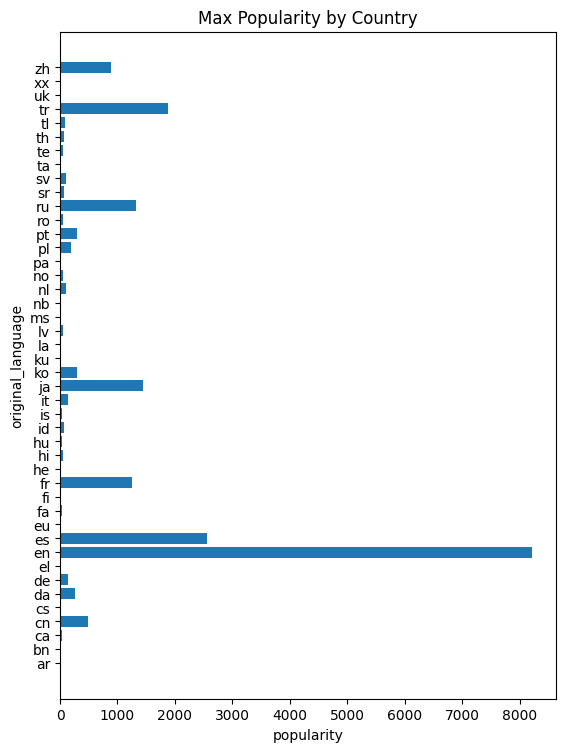

上面这张图反映了各种语言的电影的受欢迎程度，从上图可以看出，最受欢迎的电影大都是英语、法语、西班牙语等欧美国家的电影，而亚洲地区只有日语电影的受欢迎程度相对较高。这很可能是欧美地区电影业发展起步较早，各方面的技术都相对更加成熟，并且欧美电影在视觉效果上往往会更好，视觉冲击力更强。

# Part 4: 总结与反思

通过该数据集，我们可以看到电影业在进入21世纪后的迅速发展，以及疫情封控对于电影行业产生的巨大负面影响。此外，我们还能发现观众普遍更喜欢科幻、动作、冒险以及喜剧类电影，英语、法语、西班牙语等欧美国家的电影在电影市场上更受欢迎，这可能可以给我国未来商业电影的发展方向提供新的思路。

在数据处理的过程中遇到了诸多问题，有部分问题还没有很好的解决。对于原始数据集中部分地方字段错位的问题，我没能找到很好的用python代码解决的方法，最终是手动一个一个复位的，对于上百条错位，耗时相当大。此外，获取每个电影类型下最受欢迎的电影的popularity的过程中，对于genre字段中包含的各种电影类型，没能做到用python代码很好的将各个类型区分开来，由于原数据中存在“[]”等符号，导致最终得到的类型中会存在重复，即使在处理前先删去“[]”符号，重复问题仍然存在，由于数据量小，最终选择得到结果后手动删除重复的类型。